In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from scipy.interpolate import make_interp_spline, BSpline

In [15]:
# Function to save raw model data (loss for each epoch)

def saveHistory():
    hist_df = pd.DataFrame(history.history) 
    hist_csv_file = 'history_function1.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)

In [20]:
# Create a range of x values from -5 to 5

x = [i for i in range(-5, 5)]
x1 = np.asarray(x)

In [21]:
x

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [12]:
# Create a new range of values in order to plot a smooth quadratic line
xnew = np.linspace(-5.5, 5.5, 300)

In [13]:
xnew

array([-5.5       , -5.4632107 , -5.4264214 , -5.38963211, -5.35284281,
       -5.31605351, -5.27926421, -5.24247492, -5.20568562, -5.16889632,
       -5.13210702, -5.09531773, -5.05852843, -5.02173913, -4.98494983,
       -4.94816054, -4.91137124, -4.87458194, -4.83779264, -4.80100334,
       -4.76421405, -4.72742475, -4.69063545, -4.65384615, -4.61705686,
       -4.58026756, -4.54347826, -4.50668896, -4.46989967, -4.43311037,
       -4.39632107, -4.35953177, -4.32274247, -4.28595318, -4.24916388,
       -4.21237458, -4.17558528, -4.13879599, -4.10200669, -4.06521739,
       -4.02842809, -3.9916388 , -3.9548495 , -3.9180602 , -3.8812709 ,
       -3.84448161, -3.80769231, -3.77090301, -3.73411371, -3.69732441,
       -3.66053512, -3.62374582, -3.58695652, -3.55016722, -3.51337793,
       -3.47658863, -3.43979933, -3.40301003, -3.36622074, -3.32943144,
       -3.29264214, -3.25585284, -3.21906355, -3.18227425, -3.14548495,
       -3.10869565, -3.07190635, -3.03511706, -2.99832776, -2.96

In [22]:
# Calculate the predicted values in y

y = [(i**4.0 - 22 * (i ** 2.0)) for i in x]

In [23]:
# Make a spline in order to smoothly fit a quadratic function

xnew = np.linspace(-5.5, 5.5, 300)
spl = make_interp_spline(x, y, k=3)
power_smooth = spl(xnew)

y = [(i**4.0 - 22 * (i ** 2.0)) for i in xnew]
y1 = np.asarray(y)

In [24]:
y

[249.5625,
 234.19701449824254,
 219.25673334639362,
 204.73514987200645,
 190.62580136663667,
 176.92226908584303,
 163.61817824918694,
 150.70719804023418,
 138.1830416065518,
 126.03946605971078,
 114.27027247528554,
 102.8693058928526,
 91.83045531599203,
 81.14765371228657,
 70.81487801332253,
 60.826149114688974,
 51.17553187597764,
 41.85713512078348,
 32.86511163670514,
 24.193658175343444,
 15.837015452302182,
 7.789468147189041,
 0.04534490361402277,
 -7.400981670809983,
 -14.555095004466239,
 -21.42253456173586,
 -28.00879584299645,
 -34.31933038462307,
 -40.35954575898688,
 -46.134805574456834,
 -51.650429475398596,
 -56.91169314217484,
 -61.92382829114496,
 -66.69202267466568,
 -71.22142008109068,
 -75.51712033477031,
 -79.58417929605218,
 -83.42760886128082,
 -87.0523769627975,
 -90.46340756894091,
 -93.66558068404646,
 -96.66373234844653,
 -99.46265463847047,
 -102.0670956664446,
 -104.48175958069243,
 -106.71130656553413,
 -108.76035284128707,
 -110.63347066426553,
 -11

In [25]:
# Create model 

input_layer = keras.layers.Input(shape=(1,))
dense = Dense(10, activation='relu')(input_layer)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
dense = Dense(10, activation='relu')(dense)
output = Dense(1)(dense)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-29 15:00:27.567764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-29 15:00:27.572255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
# Build model

model = keras.Model(inputs=input_layer, outputs=output)

In [37]:
# Compile model 
# Available metrics: https://keras.io/api/metrics/

model.compile(loss='mse', optimizer='adam', metrics=['rmse'])

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110   

In [39]:
# Fit and run the model and save to history object for later use

history = model.fit(xnew, y1, epochs=1000, batch_size=10, verbose=1)

Epoch 1/1000


2023-03-29 16:51:36.430779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 6ms/step - loss: 38.3912 - accuracy: 0.0000e+00
Epoch 2/1000
30/30 [==============================] - 0s 7ms/step - loss: 10.7560 - accuracy: 0.0000e+00
Epoch 3/1000
30/30 [==============================] - 0s 6ms/step - loss: 3.0044 - accuracy: 0.0000e+00
Epoch 4/1000
30/30 [==============================] - 0s 6ms/step - loss: 2.8429 - accuracy: 0.0000e+00
Epoch 5/1000
30/30 [==============================] - 0s 6ms/step - loss: 6.6801 - accuracy: 0.0000e+00
Epoch 6/1000
30/30 [==============================] - 0s 6ms/step - loss: 25.7544 - accuracy: 0.0000e+00
Epoch 7/1000
30/30 [==============================] - 0s 6ms/step - loss: 25.6615 - accuracy: 0.0000e+00
Epoch 8/1000
30/30 [==============================] - 0s 6ms/step - loss: 109.9151 - accuracy: 0.0000e+00
Epoch 9/1000
30/30 [==============================] - 0s 6ms/step - loss: 63.4182 - accuracy: 0.0000e+00
Epoch 10/1000
30/30 [==============================] - 0s 6ms/step - l

In [32]:
# Make predictions for y

yhat = model.predict(xnew)

print('MSE: %.3f' % mean_squared_error(y1, yhat))

MSE: 2.166


2023-03-29 15:28:35.707572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


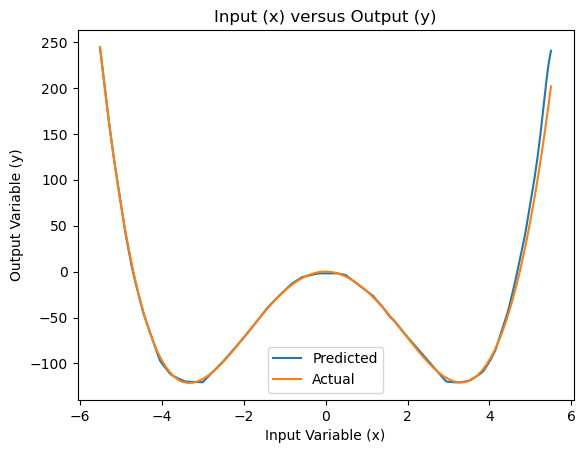

In [40]:
# Plot the predicted vs. actual values on a 2D graph

spl1 = make_interp_spline(xnew, yhat, k=3)
power_smooth1 = spl1(xnew)

plt.plot(xnew,power_smooth1, label='Predicted')
plt.plot(xnew,power_smooth, label = 'Actual')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()